In [1]:
pip install requests beautifulsoup4 pandas matplotlib


In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
url = 'https://cbr.ru/hd_base/metall/metall_base_new/?UniDbQuery.Posted=True&UniDbQuery.From=01.01.2023&UniDbQuery.To=21.09.2024&UniDbQuery.Gold=true&UniDbQuery.Silver=true&UniDbQuery.Platinum=true&UniDbQuery.Palladium=true&UniDbQuery.so=1'
response = requests.get(url)
page_content = response.content

In [5]:
soup = BeautifulSoup(page_content, 'html.parser')
table = soup.find('table', {'class': 'data'})
rows = table.find_all('tr')

In [6]:
data = []
for row in rows[1:]: # Пропускаем заголовок
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    data.append(cols)
df = pd.DataFrame(data, columns=['Date', 'Gold', 'Silver', 'Platinum', 'Palladium'])
df['Gold'] = df['Gold'].str.replace(',', '.')
df['Silver'] = df['Silver'].str.replace(',', '.')
df['Platinum'] = df['Platinum'].str.replace(',', '.')
df['Palladium'] = df['Palladium'].str.replace(',', '.')
df['Gold'] = df['Gold'].str.replace(' ', '')
df['Silver'] = df['Silver'].str.replace(' ', '')
df['Platinum'] = df['Platinum'].str.replace(' ', '')
df['Palladium'] = df['Palladium'].str.replace(' ', '')
df['Gold'] = df['Gold'].astype(float)
df['Silver'] = df['Silver'].astype(float)
df['Platinum'] = df['Platinum'].astype(float)
df['Palladium'] = df['Palladium'].astype(float)

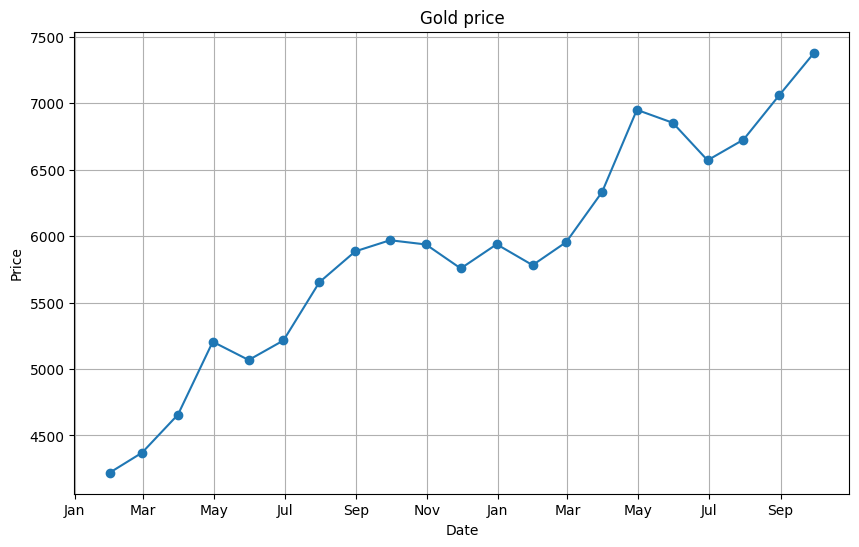

In [17]:
import matplotlib.dates as mdates

df['Date'] = pd.to_datetime(df['Date'])

df_monthly = df.groupby(pd.Grouper(key='Date', freq='M'))['Gold'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(df_monthly['Date'], df_monthly['Gold'], marker='o')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.title('Gold price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)

plt.show()

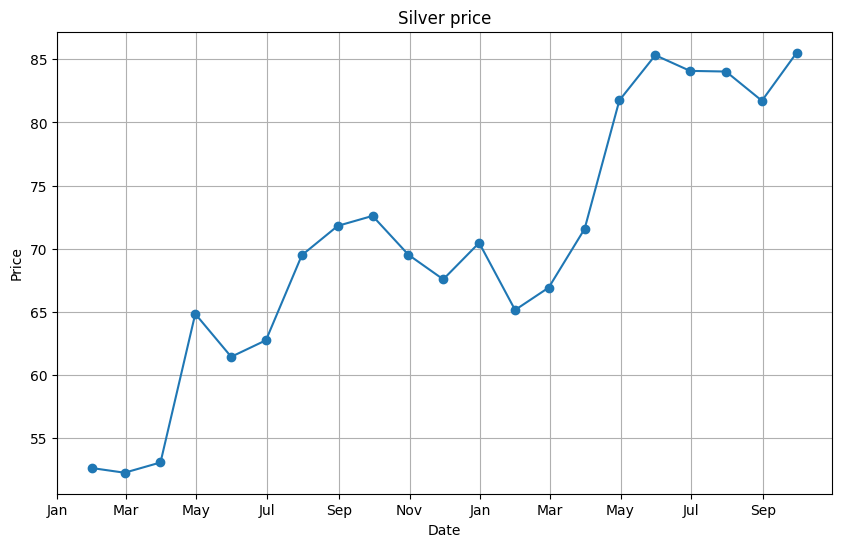

In [18]:
df['Date'] = pd.to_datetime(df['Date'])

df_monthly = df.groupby(pd.Grouper(key='Date', freq='M'))['Silver'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(df_monthly['Date'], df_monthly['Silver'], marker='o')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.title('Silver price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)

plt.show()

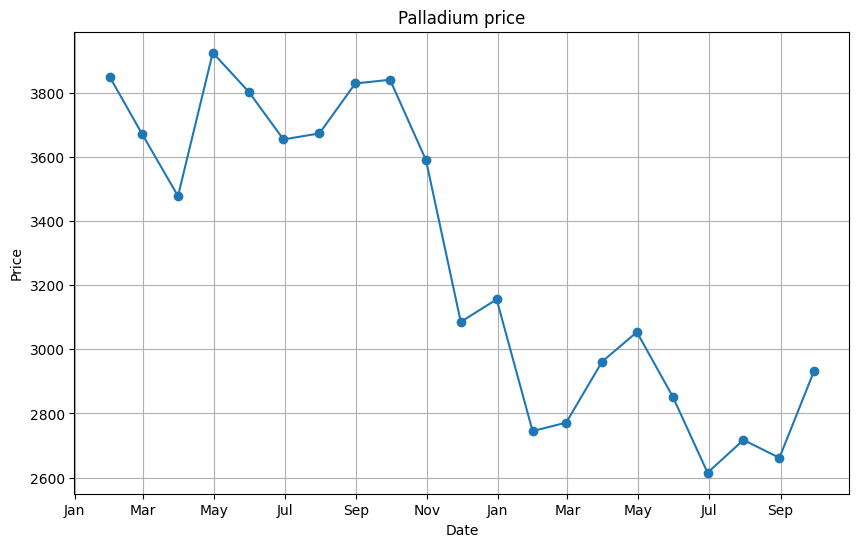

In [19]:
df['Date'] = pd.to_datetime(df['Date'])

df_monthly = df.groupby(pd.Grouper(key='Date', freq='M'))['Palladium'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(df_monthly['Date'], df_monthly['Palladium'], marker='o')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.title('Palladium price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)

plt.show()

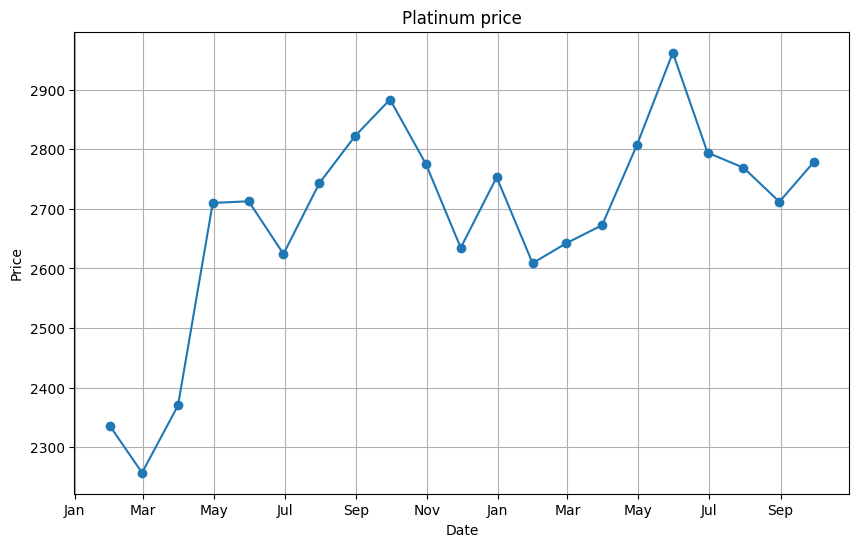

In [20]:
df['Date'] = pd.to_datetime(df['Date'])

df_monthly = df.groupby(pd.Grouper(key='Date', freq='M'))['Platinum'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(df_monthly['Date'], df_monthly['Platinum'], marker='o')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.title('Platinum price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)

plt.show()